# Introduction: 
- In this capstone project, we will use Python, specifically the PyMySQL library, to interact with a MySQL database in order to analyze and gain insights from crime data. 
- The dataset includes information such as 
1. DR NO
2. Date Reported
3. Date Occurred
4. Area Name
5. Crime Code
6. Crime Code Description
7. Victim Age
8. Victim Sex
9. Premises Description
10. Status
11. Location
12. Latitude
13. Longitude.

In [5]:
import pandas as pd                         # Read Files - tool for data manipulation and analysis
import numpy as np                          # Arithmatic Operations-  support for large, multi-dimensional arrays and matrices.  collection of mathematical functions to operate on these arrays.
import matplotlib.pyplot as plt             # Graphical Representation- plotting library for creating static, interactive, and animated visualizations
import seaborn as sns
import warnings                             #suppresses all warnings from being displayed
warnings.filterwarnings("ignore")

Establishing  connection to the database using PyMySql

In [6]:
import pymysql    #pymysql is a Python library that provides an interface for connecting to and interacting with MySQL databases
from  pymysql import connect   

# Connect to MySQL
connection = pymysql.connect(
    
    host="localhost",
    user="root",
    password="1838osr2017",
    database="minicapstone"
)
cursor = connection.cursor()

Loading the data

In [7]:
# the total number of records
a = cursor.execute("select * from crime_data")
print("Total Number of rows in the Dataset are: ",a)

Total Number of rows in the Dataset are:  499


Reading the CSV file into a DataFrame

In [9]:
# df is var name assigned to the DataFrame that wil hold the data
# 2-D labeled data structureused in data manipulation.resembles a spreadsheet/table in a relational database, where data is organized into rows and columns.
df = pd.read_csv(r"D:\Uma\ODIN SCHOOL\Folder\6 Projects\projects\python\crime_data\crime_data.csv") 

df.head()  # displays the first 5 rows of the df by default  

,DR_NO,Date_Rptd,DATE_OCC,AREA_NAME,Crm_Cd,Crm_Cd_Desc,Vict_Age,Vict_Sex,Premis_Desc,Status,Location,LAT,LON
0,10304468,01-08-2020,01-08-2020,Southwest,624,BATTERY - SIMPLE ASSAULT,36,F,SINGLE FAMILY DWELLING,AO,1100 W 39TH PL,34.01,-118.30
1,190101086,01-02-2020,01-01-2020,Central,624,BATTERY - SIMPLE ASSAULT,25,M,SIDEWALK,IC,700 S HILL ST,34.05,-118.25
2,191501505,01-01-2020,01-01-2020,N Hollywood,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,F,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,5400 CORTEEN PL,34.17,-118.40
3,191921269,01-01-2020,01-01-2020,Mission,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31,X,BEAUTY SUPPLY STORE,IC,14400 TITUS ST,34.22,-118.45
4,200100502,01-02-2020,01-02-2020,Central,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),23,M,DEPARTMENT STORE,IC,700 S FIGUEROA ST,34.05,-118.26


In [10]:
# randomly select 2 rows from your DataFrame df & display it

df.sample(2)

,DR_NO,Date_Rptd,DATE_OCC,AREA_NAME,Crm_Cd,Crm_Cd_Desc,Vict_Age,Vict_Sex,Premis_Desc,Status,Location,LAT,LON
229,200104703,01-01-2020,01-01-2020,Central,330,BURGLARY FROM VEHICLE,27,M,PARKING LOT,IC,1100 S FIGUEROA ST,34.05,-118.23
437,200106409,02-04-2020,01-04-2020,Central,662,"BUNCO, GRAND THEFT",67,M,OTHER RESIDENCE,IC,4000 CRENSHAW BL,34.06,-118.24


In [11]:
#  df.info() :- method provides a concise summary of DataFrame

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DR_NO        499 non-null    int64  
 1   Date_Rptd    499 non-null    object 
 2   DATE_OCC     499 non-null    object 
 3   AREA_NAME    499 non-null    object 
 4   Crm_Cd       499 non-null    int64  
 5   Crm_Cd_Desc  499 non-null    object 
 6   Vict_Age     499 non-null    int64  
 7   Vict_Sex     472 non-null    object 
 8   Premis_Desc  499 non-null    object 
 9   Status       499 non-null    object 
 10  Location     499 non-null    object 
 11  LAT          499 non-null    float64
 12  LON          499 non-null    float64
dtypes: float64(2), int64(3), object(8)
memory usage: 50.8+ KB


In [12]:
# df.nunique() method returns the number of unique values in each column of the DataFrame

df.nunique()


DR_NO          499
Date_Rptd       68
DATE_OCC        61
AREA_NAME       19
Crm_Cd          42
Crm_Cd_Desc     42
Vict_Age        66
Vict_Sex         3
Premis_Desc     67
Status           4
Location       365
LAT             35
LON             29
dtype: int64

In [13]:
# df.shape attribute returns a tuple representing the dimensions of the DataFrame.

df.shape

(499, 13)

In [14]:
# provides descriptive statistics for numerical columns in the DataFrame.

df.describe()  

,DR_NO,Crm_Cd,Vict_Age,LAT,LON
count,4.990000e+02,499.000000,499.000000,499.000000,499.000000
mean,1.999930e+08,504.178357,32.142285,34.047335,-118.261283
std,8.742243e+06,198.381863,20.202136,0.053840,0.041560
min,1.030447e+07,210.000000,0.000000,33.710000,-118.560000
25%,2.001044e+08,330.000000,23.000000,34.040000,-118.260000
50%,2.001048e+08,442.000000,31.000000,34.050000,-118.250000
75%,2.001064e+08,624.000000,46.500000,34.050000,-118.240000
max,2.220130e+08,956.000000,78.000000,34.280000,-118.190000


In [15]:
# returns a list of column names of the DataFrame
df.columns

Index(['DR_NO', 'Date_Rptd', 'DATE_OCC', 'AREA_NAME', 'Crm_Cd', 'Crm_Cd_Desc',
       'Vict_Age', 'Vict_Sex', 'Premis_Desc', 'Status', 'Location', 'LAT',
       'LON'],
      dtype='object')

### Check if there are null values

In [16]:
df.isnull().sum()


DR_NO           0
Date_Rptd       0
DATE_OCC        0
AREA_NAME       0
Crm_Cd          0
Crm_Cd_Desc     0
Vict_Age        0
Vict_Sex       27
Premis_Desc     0
Status          0
Location        0
LAT             0
LON             0
dtype: int64

In [17]:
 # fills missing values in the "Vict_Sex" column with the calculated mode

df['Vict_Sex'] = df['Vict_Sex'].fillna(df['Vict_Sex'].mode()[0])


In [18]:
# check if there is any missing value in any column

df.isnull().sum()

DR_NO          0
Date_Rptd      0
DATE_OCC       0
AREA_NAME      0
Crm_Cd         0
Crm_Cd_Desc    0
Vict_Age       0
Vict_Sex       0
Premis_Desc    0
Status         0
Location       0
LAT            0
LON            0
dtype: int64

In [36]:
# Identify the distinct crime codes and their descriptions.

# distinct_crime_data = df[['Crm_Cd', 'Crm_Cd_Desc']].drop_duplicates()
# print("Distinct Crime Codes are: ", len(distinct_crime_data))
# print(distinct_crime_data)

b = "select Distinct Crm_Cd, Crm_Cd_Desc from crime_data "
df1 = pd.read_sql(b,connection)
df1

,Crm_Cd,Crm_Cd_Desc
0,624,BATTERY - SIMPLE ASSAULT
1,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER)
2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA..."
3,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER)
4,946,OTHER MISCELLANEOUS CRIME
5,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI..."
6,330,BURGLARY FROM VEHICLE
7,930,CRIMINAL THREATS - NO WEAPON DISPLAYED
8,648,ARSON
9,354,THEFT OF IDENTITY


### (Q-1) SPATIAL ANALYSIS
 Where are the geographical hotspots for reported crimes?

In [20]:
df["AREA_NAME"].value_counts()  #calculates the frequency of each unique value in the "AREA_NAME" column.


AREA_NAME
Central        423
Northeast       12
Harbor          12
Rampart          8
Hollywood        6
77th Street      5
Wilshire         5
West LA          5
Southwest        4
Hollenbeck       4
Van Nuys         4
Foothill         2
West Valley      2
N Hollywood      2
Pacific          1
Mission          1
Olympic          1
Devonshire       1
Southeast        1
Name: count, dtype: int64

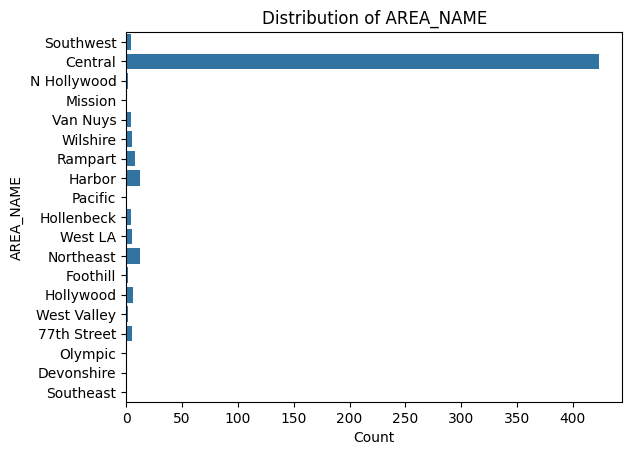

In [21]:
#Seaborn Countplot-to create a bar plot showing the count or visualizing the distribution or frequency
sns.countplot(data=df, y="AREA_NAME")  
plt.title("Distribution of AREA_NAME")
plt.xlabel("Count")
plt.ylabel("AREA_NAME")
plt.show()



Utilize the geographical information (Latitude and Longitude) to perform spatial analysis.

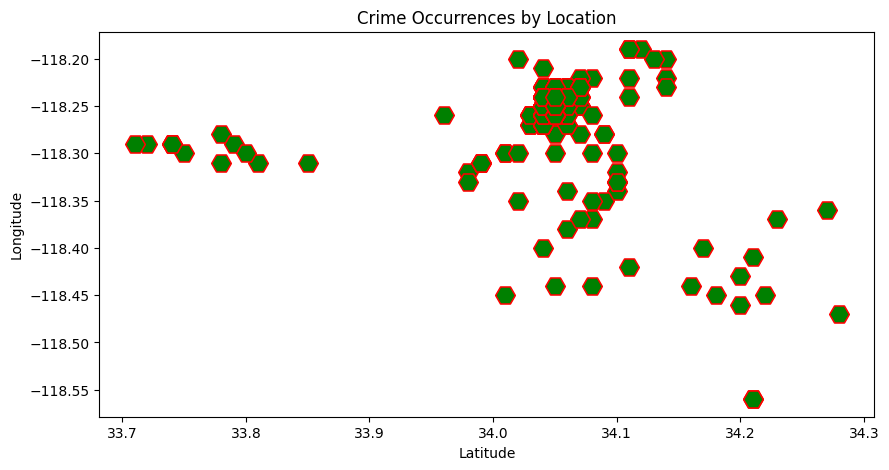

In [22]:
plt.figure(figsize=(10, 5))

# Create a scatter plot for latitude and longitude
# sns.scatterplot-showing the relationship between two numerical variables. or visualizing patterns, correlations, 
# or relationships between continuous variables.

sns.scatterplot(x='LAT', y='LON', data=df ,marker = 'H',s=200, facecolor= 'green', edgecolor = 'red')

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Crime Occurrences by Location')

# Show the plot
plt.show()

### (Q-2) VICTIM DEMOGRAPHIC
2.1 What is the distribution of victim ages in reported crimes?

In [37]:
# cursor.execute("select Vict_Age, count(Vict_Age) as Age_count from crime_data GROUP BY Vict_Age ORDER BY Vict_Age  ")
# cursor.fetchall()

c = "select Vict_Age, count(Vict_Age) as Age_count from crime_data GROUP BY Vict_Age ORDER BY Vict_Age  "
df1 = pd.read_sql(c, connection)
df1

,Vict_Age,Age_count
0,0,90
1,8,1
2,9,1
3,12,2
4,13,1
...,...,...
61,73,2
62,74,1
63,75,2
64,76,1


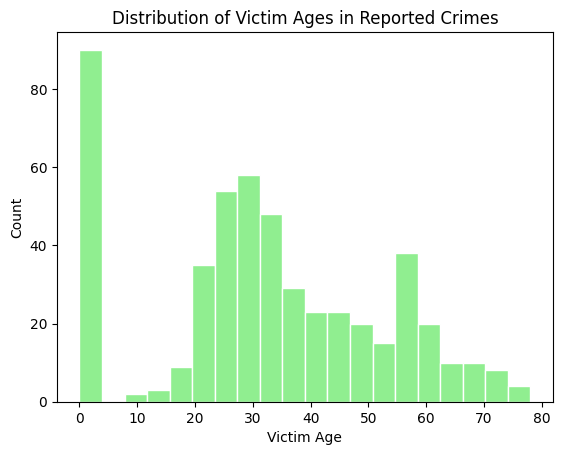

In [24]:
# Create a histogram
plt.hist(df['Vict_Age'], bins=20, facecolor ='lightgreen',edgecolor ='white')

plt.xlabel('Victim Age')   # Add labels and title
plt.ylabel('Count')
plt.title('Distribution of Victim Ages in Reported Crimes')

plt.show()  # Show the plot

2.2 Is there a significant difference in crime rates between male and female victims?

In [39]:
b = "select Vict_Age,Vict_Sex,count(*) as crime_count from crime_data group by Vict_Age,Vict_Sex ORDER BY  crime_count DESC"
df1 = pd.read_sql(b,connection)  # b contains your SQL query.
                                 # connection represents the database connection object.
df1

,Vict_Age,Vict_Sex,crime_count
0,0,X,36
1,0,,27
2,0,M,21
3,23,M,14
4,35,M,14
...,...,...,...
116,52,M,1
117,63,M,1
118,78,F,1
119,75,F,1


<Axes: xlabel='Vict_Age', ylabel='crime_count'>

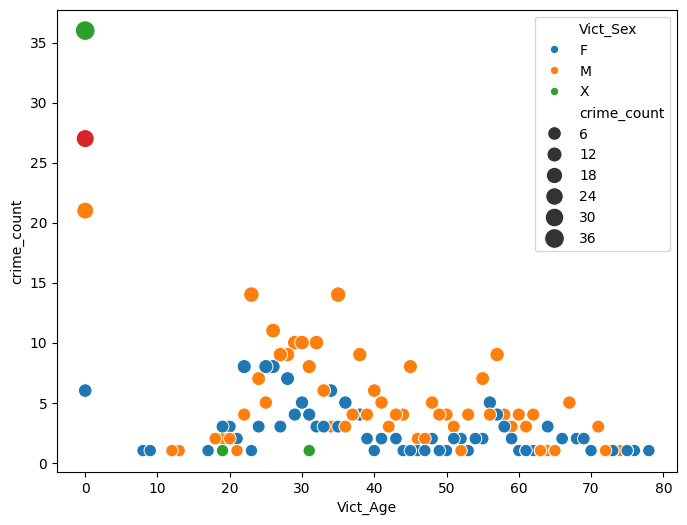

In [26]:
plt.figure(figsize = (8,6))
sns.scatterplot( data=df1, x="Vict_Age", y="crime_count", hue="Vict_Sex", size="crime_count", sizes=(80, 200))

# hue is commonly used in various plots to add color differentiation

In [27]:
df["Vict_Sex"].value_counts()    # value count fx to know count in each category

Vict_Sex
M    305
F    155
X     39
Name: count, dtype: int64

- Most crime Victims are Male.

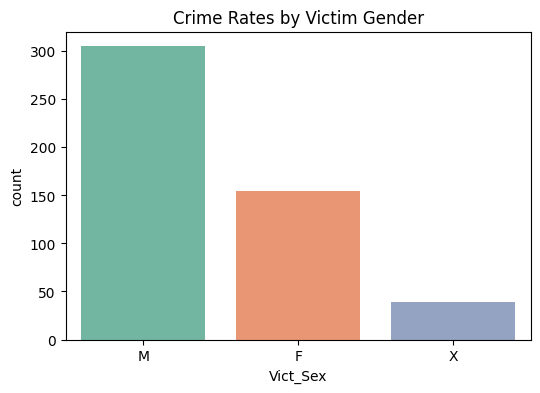

In [28]:
plt.figure(figsize=(6, 4))

# countplot comparing crime rates between male and female victims
sorted_counts = df["Vict_Sex"].value_counts().sort_values(ascending=False)

#show the counts of observations in each category of a categorical variable
sns.countplot(x=df["Vict_Sex"],order=sorted_counts.index, palette='Set2')

plt.title('Crime Rates by Victim Gender')
plt.show()


### (Q-3) LOCATION ANALYSIS
3.1 Identify common premises descriptions where crimes occur. 

In [29]:
premises_counts = df['Premis_Desc'].value_counts().head(10)  # Value count for premis description
premises_counts

# a = df['Premis_Desc'].value_counts().head(10)
# a

Premis_Desc
STREET                                          105
SIDEWALK                                         62
PARKING LOT                                      46
MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)     45
SINGLE FAMILY DWELLING                           25
VEHICLE, PASSENGER/TRUCK                         21
OTHER BUSINESS                                   19
DEPARTMENT STORE                                 17
OTHER STORE                                      14
LA UNION STATION (NOT LINE SPECIFIC)             13
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Premis_Desc'>

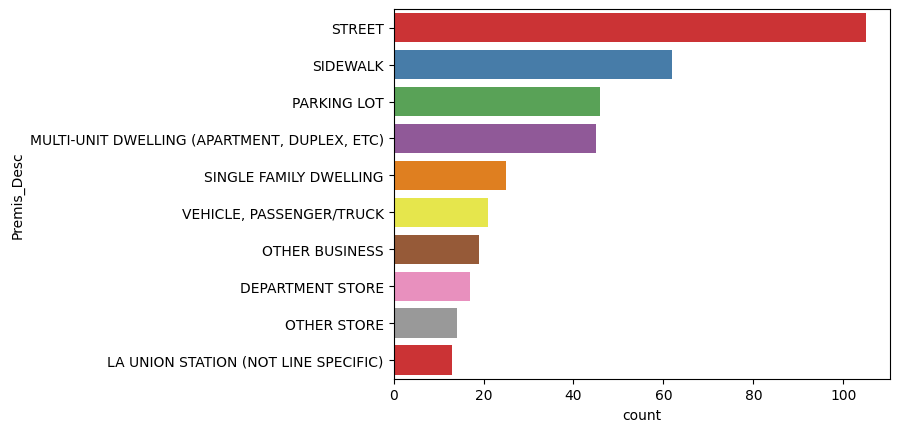

In [30]:
#  top 10 Premises
sns.countplot(y=df["Premis_Desc"], palette='Set1', order=df["Premis_Desc"].value_counts().index[:10])  

# plt.barh(premises_counts.index, premises_counts)     

3.2 Where do most crimes occur based on the "Location" column?

In [31]:
Crime_loc =df['Location'].value_counts().head(10)
Crime_loc

Location
800 N ALAMEDA ST      14
700 W 7TH ST          11
1100 S FIGUEROA ST     6
300 E 5TH ST           6
6TH                    6
100 E 5TH ST           5
600 S SPRING ST        5
500 S SAN PEDRO ST     5
7TH ST                 5
700 S FLOWER ST        4
Name: count, dtype: int64

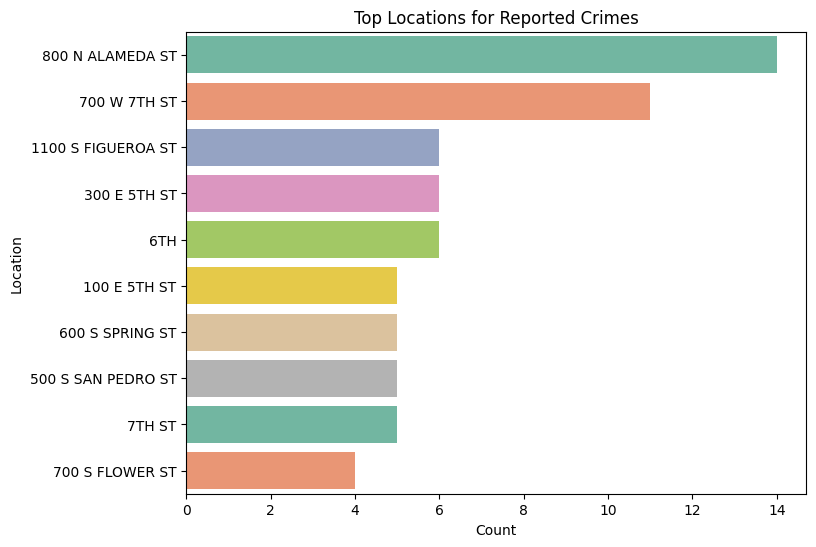

In [32]:
plt.figure(figsize=(8, 6))

# Create a countplot
sns.countplot(y=df["Location"], palette='Set2', order=Crime_loc.index[:10])  # Show top 10 locations

# Add labels and title
plt.xlabel('Count')
plt.ylabel('Location')
plt.title('Top Locations for Reported Crimes')
plt.show()


### (Q-4) CRIME CODE ANALYSIS
4.1 What is the distribution of reported crimes based on Crime Code?

In [40]:
# df['Crm_Cd'].value_counts().head(10) # value count fx to know count of each crime codes
b = "select Crm_Cd, Crm_Cd_Desc , count(Crm_Cd) Crime_cd_code from crime_data group by Crm_Cd, Crm_Cd_Desc order by Crime_cd_code desc"
df1 = pd.read_sql(b,connection)
df1.head(10)

,Crm_Cd,Crm_Cd_Desc,Crime_cd_code
0,330,BURGLARY FROM VEHICLE,82
1,624,BATTERY - SIMPLE ASSAULT,74
2,440,THEFT PLAIN - PETTY ($950 & UNDER),44
3,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),28
4,510,VEHICLE - STOLEN,28
5,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",26
6,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",24
7,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),23
8,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",23
9,888,TRESPASSING,19


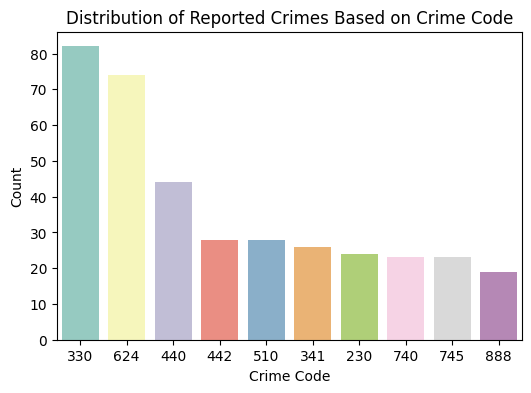

In [34]:
plt.figure(figsize=(6, 4))

# Create a countplot
sns.countplot(x=df["Crm_Cd"], order=df["Crm_Cd"].value_counts().index[:10], palette='Set3') # top 10 crime codes

# Add labels and title
plt.xlabel('Crime Code')
plt.ylabel('Count')
plt.title('Distribution of Reported Crimes Based on Crime Code')
plt.show()


4.2 Classify crimes based on their current status

Status
IC    447
AA     27
AO     24
JO      1
Name: count, dtype: int64


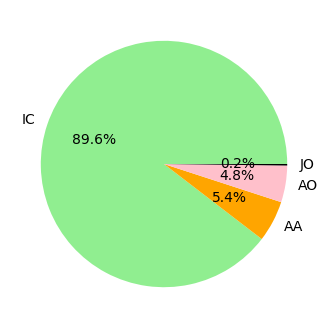

In [41]:

# df["Status"].value_counts().head(5).plot(kind="barh")

count = df['Status'].value_counts()
List_of_Labels = ["IC", "AA", "AO", "JO"]
plt.figure(figsize=(6,4))
plt.pie(count, labels= List_of_Labels,autopct = '%1.1f%%',colors= ['lightgreen','orange','pink','black'])
# autopct to show after point k kitne decimals, double %% pie chart k andar show krne k liye
print(count)

##  Most Crime victims are: 
    - MALE
## Most occured crime code  is: 
    - 330	BURGLARY FROM VEHICLE  82 times
## Top Locations for Reported Crimes:
    - 800 N ALAMEDA ST   14 times
## Geographical hotspots for reported crimes:
    - Central